In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats.distributions import chi2

In [2]:
# data
N = 10000
σ2 = 1/3  # noise precision
x = np.random.uniform(-1, 1, size=N)
X = np.hstack([x.reshape(-1, 1), np.ones((N, 1))])
w = np.array([2, 1]).reshape(-1, 1)
y = (X @ w) + np.random.normal(loc=0, scale=σ2 ** 0.5, size=(N, 1))
print(x.shape, X.shape, y.shape)

(10000,) (10000, 2) (10000, 1)


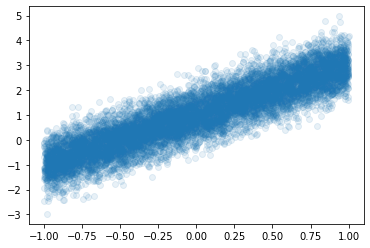

In [3]:
plt.scatter(x, y, alpha=0.1)
plt.show()

In [4]:
# prior hyper-parameters
w0 = np.array([[0], [0]])
V0 = np.eye(2)

In [5]:
# posterior parameters
VN = inv(inv(V0) + (1/σ2) * X.T @ X)
wN = VN @ (inv(V0) @ w0 + (1/σ2) * X.T @ y)

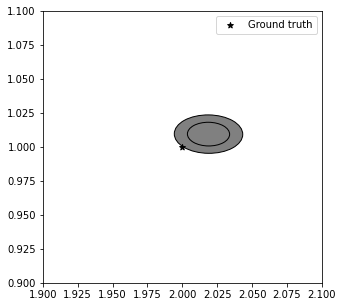

In [6]:
# plot the 68 and 95 contours of the posterior

eigval, eigvec = np.linalg.eig(VN)

plt.figure(figsize=(5, 5))

indices = np.argsort(eigval)
if not indices[0] == 0:
    eigval = np.array([eigval[1], eigval[0]])
    eigvec = np.array([eigvec[:,1], eigvec[:,0]]).T

ellipse = Ellipse(
    xy=(wN[0][0], wN[1][0]), 
    height=2*np.sqrt(chi2.ppf(0.95, df=2)*eigval[0]), 
    width=2*np.sqrt(chi2.ppf(0.95, df=2)*eigval[1]), 
    angle=np.arctan(eigvec[:,1][1] / (eigvec[:,1][0] + 1e-3)) / np.pi * 180,
    edgecolor='black',
    fc='gray', 
)

ellipse_smaller = Ellipse(
    xy=(wN[0][0], wN[1][0]), 
    height=2*np.sqrt(chi2.ppf(0.68, df=2)*eigval[0]), 
    width=2*np.sqrt(chi2.ppf(0.68, df=2)*eigval[1]), 
    angle=np.arctan(eigvec[:,1][1] / (eigvec[:,1][0] + 1e-3)) / np.pi * 180,
    edgecolor='black',
    fc='gray', 
)

plt.gca().add_patch(ellipse)
plt.gca().add_patch(ellipse_smaller)

plt.xlim(2-0.1, 2+0.1)
plt.ylim(1-0.1, 1+0.1)

plt.scatter([2], [1], color="black", marker="*", label="Ground truth")

plt.legend()

plt.show()